In [1]:
%matplotlib inline
import numpy as np
import pandas as pd


## Loading the data

In [2]:
## Data is te downloaden op https://maps.amsterdam.nl/open_geodata/ (niet woon-functies)
functie_kaart = pd.read_csv("C:\\Users\\Jeffr\\Downloads\\\DataSystemProjects\\FUNCTIEKAART.csv", sep= ';',error_bad_lines=False)

In [10]:
# functie_kaart.head()
hotels = functie_kaart.loc[functie_kaart["FUNCTIE2_ENG"] == 'Hotel - Lodging']


## Cleansing

In [27]:
##Taak Jeffrey wanneer we het gaan gebruiken

hotels.LNG = hotels.LNG.str.replace(',','.').apply(pd.to_numeric)
hotels.LAT = hotels.LAT.str.replace(',','.').apply(pd.to_numeric)
hotels.tail()

,OBJECTNUMMER,FUNCTIE2_OMS,ZAAKNAAM,FUNCTIE2_ENG,FUNCTIE1_ID,FUNCTIE1_OMS,FUNCTIE1_ENG,FUNCTIE2_ID,LAAG,ADRESSEN_LIJST,ADRESSEN_VOT,ADRESSEN_AANTAL,OPPERVLAKTE_SOM,OPPERVLAKTE_NUL,CHECKDATUM,ZAAK_ID,COORDS,LNG,LAT,Unnamed: 19
27251,43389,Hotel - Logies,JOY HOTEL,Hotel - Lodging,H,Horeca,"Hotels, bars, restaurants",H01,1,Hullenbergweg 385 - 3107 m2<br>,03630000994032,1,3107,0,2018-01-18,20174372,"POLYGON((4.9504780 52.3052420,4.9503940 52.305...",4.950266,52.305230,NaN
27434,45446,Hotel - Logies,HOTEL VIA,Hotel - Lodging,H,Horeca,"Hotels, bars, restaurants",H01,1,Diemerhof 20 - 12097 m2<br>,0384010000015914,1,12097,0,2018-04-21,20175210,"POLYGON((4.953716 52.325843,4.953428 52.326159...",4.953750,52.326124,NaN
27535,45672,Hotel - Logies,GOODSTAY,Hotel - Lodging,H,Horeca,"Hotels, bars, restaurants",H01,1,Bergwijkdreef 16A - 50 m2<br>Bergwijkdreef 18A...,0384010000013876-0384010000013877-038401000001...,13,650,0,2018-04-21,20175436,"POLYGON((4.960291 52.326011,4.959973 52.325901...",4.960087,52.326003,NaN
27596,45818,Hotel - Logies,LEEGSTAND,Hotel - Lodging,H,Horeca,"Hotels, bars, restaurants",H01,1,Van der Madeweg 41 - 19119 m2<br>,0437010000004237,1,19119,0,2018-03-28,20175582,"POLYGON((4.922224 52.325542,4.922329 52.325429...",4.921949,52.325373,NaN
27735,46053,Hotel - Logies,BASTION HOTEL,Hotel - Lodging,H,Horeca,"Hotels, bars, restaurants",H01,1,Verlengde Van Marwijk Kooystraat 30 - 3883 m2<br>,0437010000003108,1,3883,0,2018-03-28,20175841,"POLYGON((4.928071 52.333416,4.927874 52.333348...",4.927629,52.333669,NaN


## Analyse

In [28]:
# hotels.isnull().sum()
hotels.describe()

#  Totaal aantal hotels is volgens:https://www.ois.amsterdam.nl/toerisme in juli 2017 telde Amsterdam 479 hotels met een verwachte groei in 2018 van 9%  ons aantal van 525 valt hier precies in :) 

hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 1639 to 27735
Data columns (total 20 columns):
OBJECTNUMMER       525 non-null int64
FUNCTIE2_OMS       525 non-null object
ZAAKNAAM           520 non-null object
FUNCTIE2_ENG       525 non-null object
FUNCTIE1_ID        525 non-null object
FUNCTIE1_OMS       525 non-null object
FUNCTIE1_ENG       525 non-null object
FUNCTIE2_ID        525 non-null object
LAAG               525 non-null int64
ADRESSEN_LIJST     517 non-null object
ADRESSEN_VOT       517 non-null object
ADRESSEN_AANTAL    525 non-null int64
OPPERVLAKTE_SOM    525 non-null int64
OPPERVLAKTE_NUL    525 non-null int64
CHECKDATUM         525 non-null object
ZAAK_ID            525 non-null int64
COORDS             525 non-null object
LNG                525 non-null float64
LAT                525 non-null float64
Unnamed: 19        0 non-null float64
dtypes: float64(3), int64(6), object(11)
memory usage: 86.1+ KB


## Try datashader plot -- we can delete this one

In [15]:
from bokeh.models import HoverTool
from bokeh.plotting import figure, output_notebook
#from bokeh.tile_providers import WMTSTileSource
import datashader as ds
import datashader.transfer_functions as tf
from datashader.bokeh_ext import InteractiveImage
from datashader.colors import inferno, Hot
from IPython.core.display import clear_output
import warnings
warnings.filterwarnings("ignore")
output_notebook()

Loading BokehJS ...

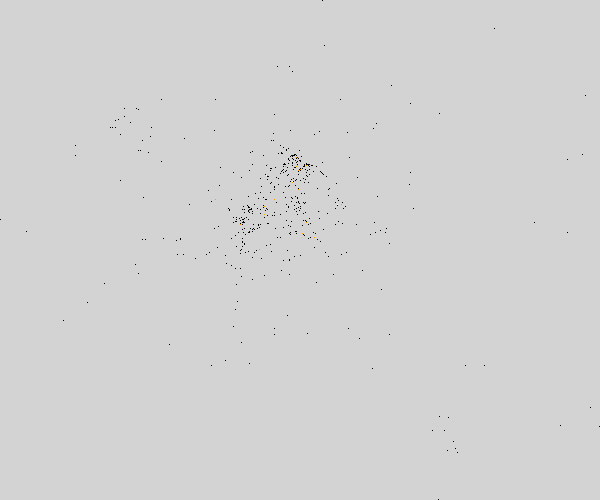

In [29]:
cvs = ds.Canvas(plot_width=600, plot_height=500)
agg = cvs.points(hotels, 'LNG', 'LAT', ds.count())#ds.mean('price'))
img = tf.shade(agg, cmap=Hot, how='log')
img = tf.set_background(img,'lightgrey')

img